<a href="https://colab.research.google.com/github/komalk98/battle/blob/main/battles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
battle = pd.read_csv('/content/sample_data/battles.csv')

In [ ]:
battle.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [ ]:
battle.shape    

(38, 25)

In [ ]:
battle.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [ ]:
battle.rename(columns={'attacker_1':'primary_attacker'},inplace=True)
battle.head()


,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [ ]:
battle.rename(columns={'defender_1':'primary_defender'},inplace=True)
battle.head()

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,primary_defender,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [ ]:
battle['attacker_king'].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

In [ ]:
battle['location'].value_counts()

Riverrun                                3
Winterfell                              3
Storm's End                             2
Harrenhal                               2
Darry                                   2
Moat Cailin                             2
Deepwood Motte                          2
Torrhen's Square                        2
Golden Tooth                            1
Seagard                                 1
Castle Black                            1
Shield Islands                          1
Saltpans                                1
Ruby Ford                               1
Ryamsport, Vinetown, Starfish Harbor    1
Dragonstone                             1
The Twins                               1
Red Fork                                1
Duskendale                              1
King's Landing                          1
Crag                                    1
Mummer's Ford                           1
Oxcross                                 1
Stony Shore                       

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 

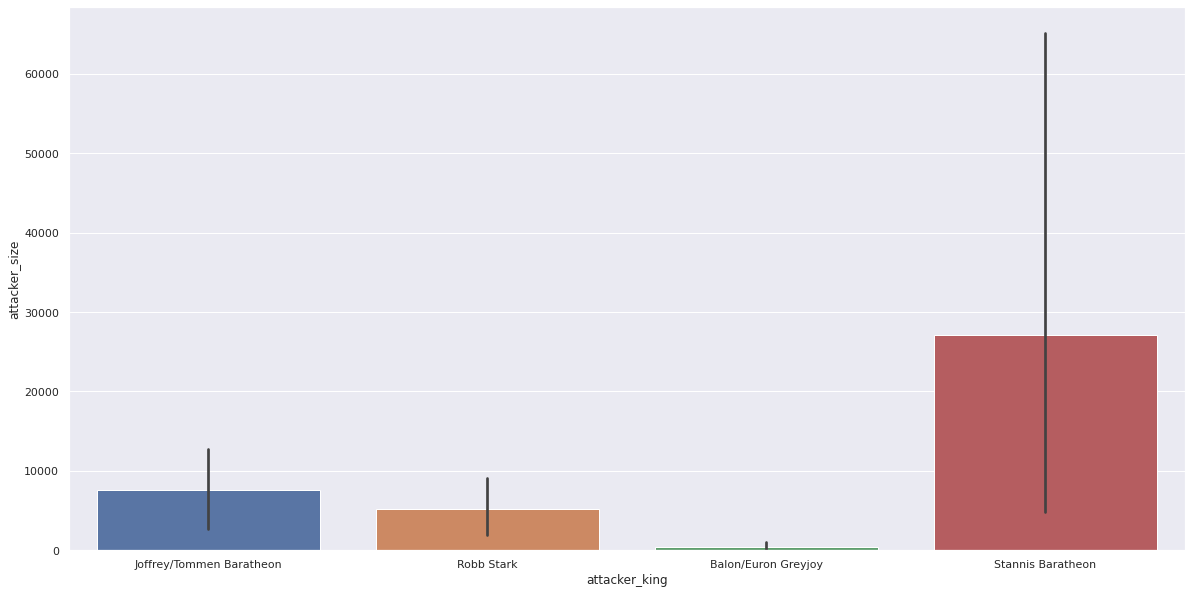

In [ ]:
from matplotlib import rc
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=battle, x='attacker_king', y='attacker_size')
plt.show()

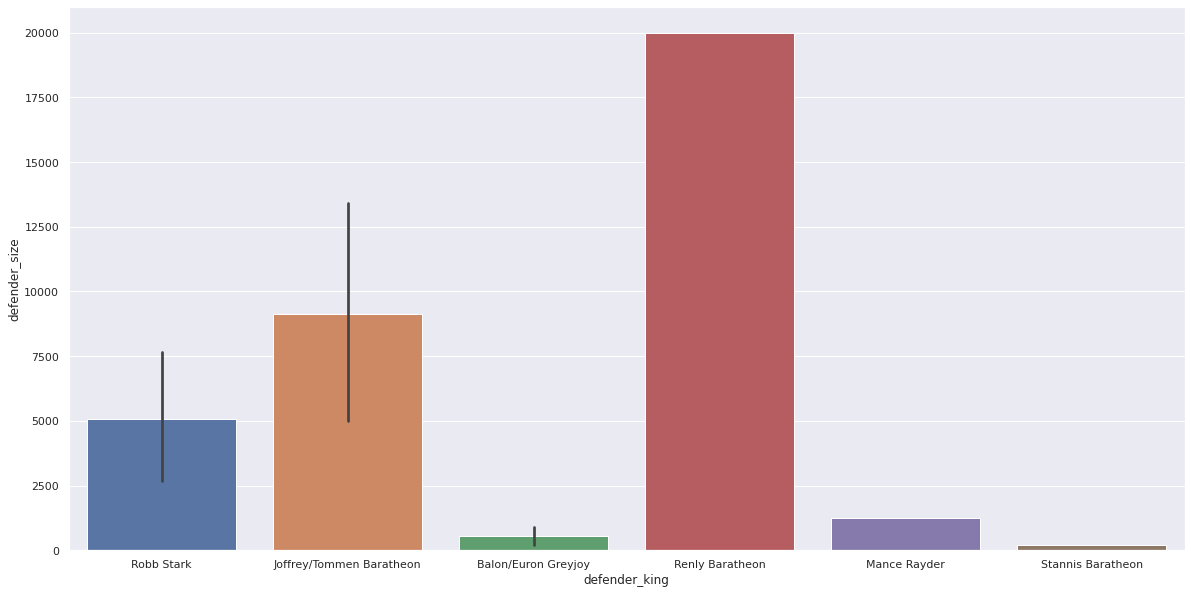

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=battle, x='defender_king',y='defender_size')
plt.show()

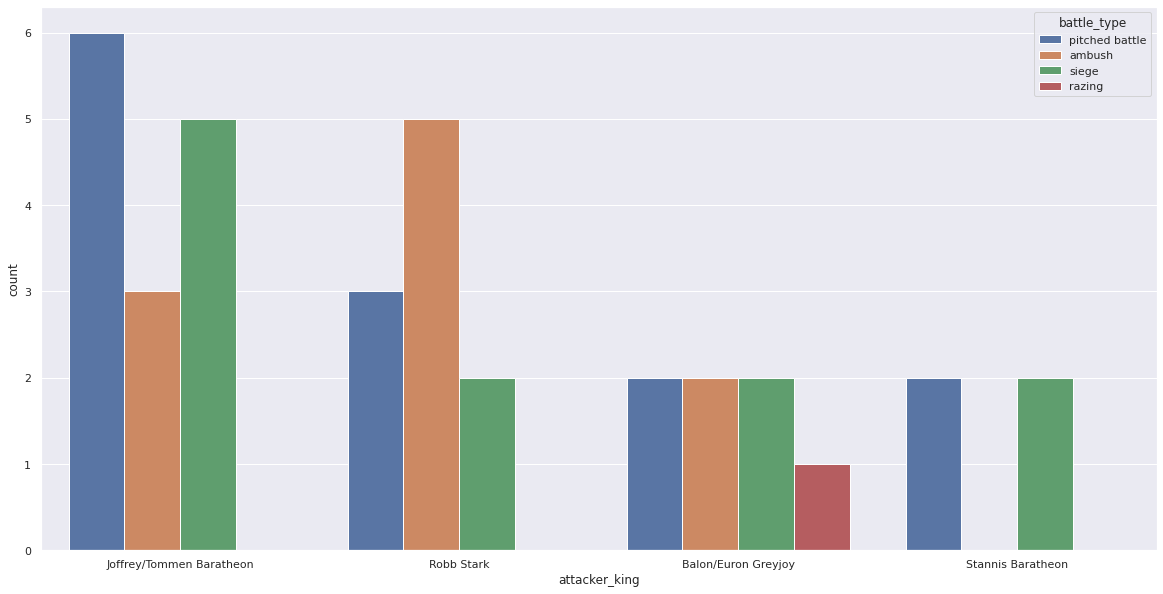

In [ ]:
sns.countplot(data=battle, x='attacker_king', hue='battle_type')
plt.show()

## ***the following code is related to death dataset ***:

In [ ]:
death = pd.read_csv('/content/sample_data/character-deaths.csv')
death.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [ ]:
death.shape

(917, 13)

In [ ]:
death.columns

Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

In [ ]:
death.Gender.value_counts().reset_index()

,index,Gender
0,1,760
1,0,157


In [ ]:
death.Name.value_counts()

Myles              2
Addam Marbrand     1
Othell Yarwyck     1
Olyvar Frey        1
Ondrew Locke       1
                  ..
Grunt              1
Gueren             1
Guncer Sunglass    1
Guyard Morrigen    1
Talbert Serry      1
Name: Name, Length: 916, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


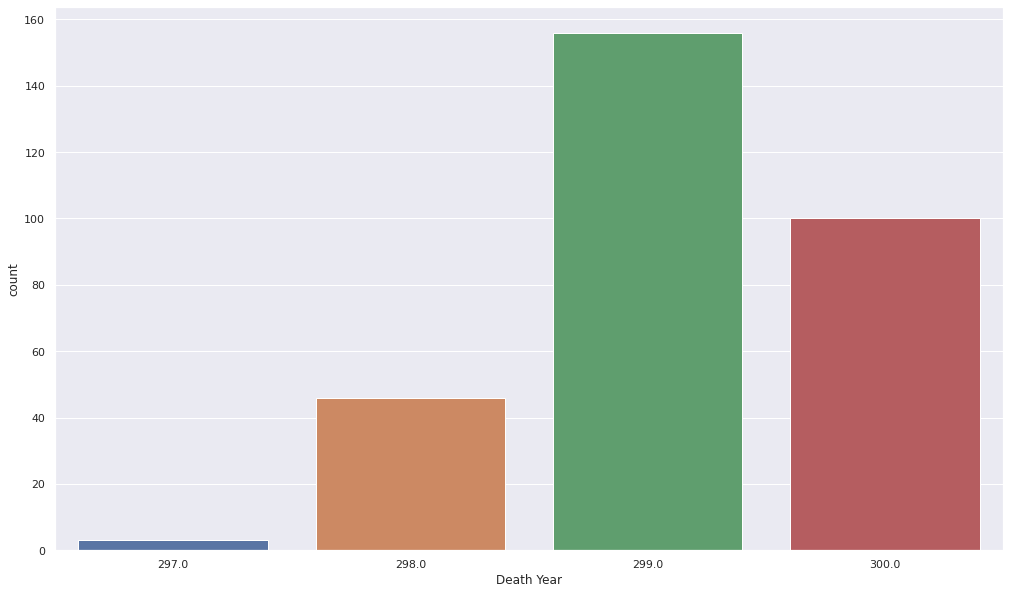

In [ ]:
sns.set(rc={'figure.figsize':(17,10)})
sns.countplot(death['Death Year'])
plt.show()

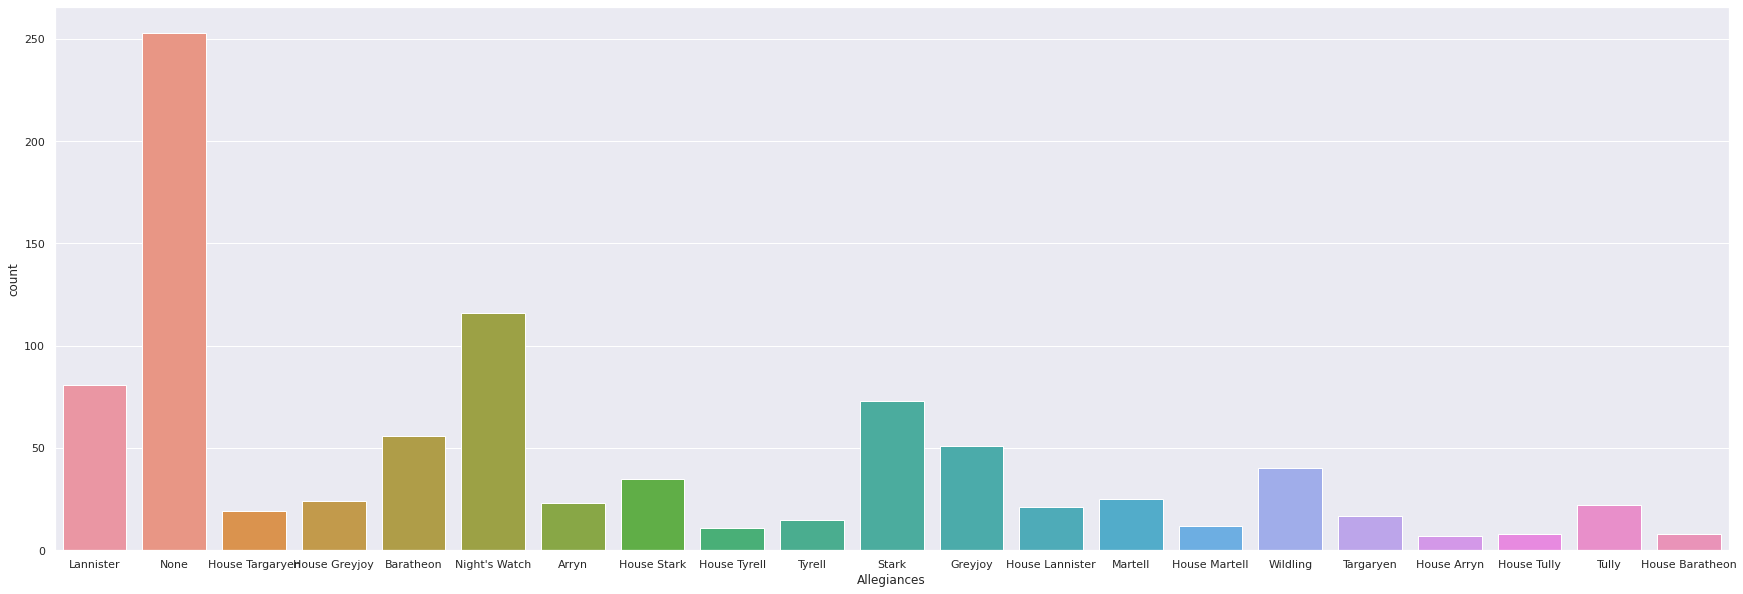

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(data=death,x='Allegiances')
plt.show()


In [ ]:
death.columns.shape

(13,)

In [ ]:
death.isnull().any()

Name                  False
Allegiances           False
Death Year             True
Book of Death          True
Death Chapter          True
Book Intro Chapter     True
Gender                False
Nobility              False
GoT                   False
CoK                   False
SoS                   False
FfC                   False
DwD                   False
dtype: bool

In [ ]:
r = death[(death['Allegiances'] == 'Lannister') & (death['Gender'] == 0)]
r


,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
133,Chella,Lannister,NaN,NaN,NaN,56.0,0,0,1,1,1,0,0
248,Falyse Stokeworth,Lannister,300.0,5.0,36.0,2.0,0,1,0,1,0,1,0
274,Genna Lannister,Lannister,NaN,NaN,NaN,33.0,0,1,0,0,0,1,0
377,Jacelyn Bywater,Lannister,299.0,2.0,19.0,8.0,0,1,0,1,0,0,0
402,Jocelyn Swyft,Lannister,NaN,NaN,NaN,3.0,0,1,0,0,0,1,1
472,Lollys Stokeworth,Lannister,NaN,NaN,NaN,2.0,0,1,0,1,1,0,0
584,Myrcella Baratheon,Lannister,NaN,NaN,NaN,5.0,0,1,1,1,0,1,0
753,Shae,Lannister,300.0,3.0,77.0,62.0,0,0,1,1,1,0,0
781,Sybell Spicer,Lannister,NaN,NaN,NaN,14.0,0,1,0,0,1,1,0
789,Taena of Myr,Lannister,NaN,NaN,NaN,6.0,0,1,0,0,1,1,0
